In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
funcs = [
    lambda x, y: np.exp(y + np.sin(x)),
    lambda x, y: np.exp(y) * np.cos(x),
    lambda x, y: np.sin(x) * np.cos(y)
]

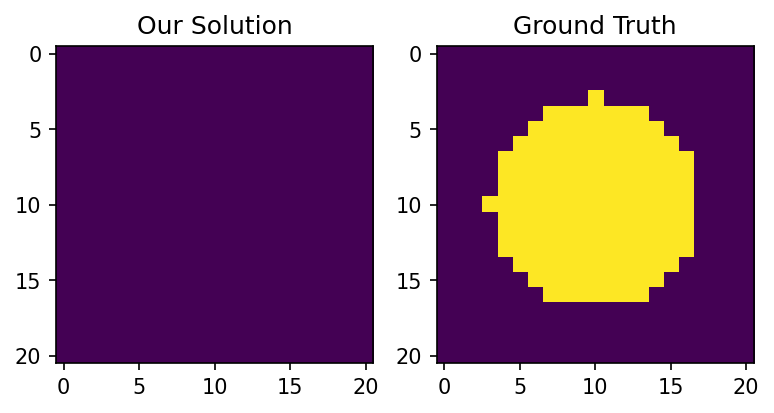

1-norm: 329752499999963.9
2-norm: 245621106502876.88
infty-norm: 329752499999965.7


In [3]:
with open('grid_val_output.txt') as f:
    # our solution
    vals = np.array([[float(s) if s != '*' else np.inf for s in lines[:-2].split(' ')] for lines in f.readlines()])
    exterior = vals == np.inf
    exterior_val = vals.min() * 2 - vals[1 - exterior].max()
    vals[exterior] = exterior_val
    # ground truth
    x = np.arange(0.0, 1.05, 0.05)
    y = np.arange(0.0, 1.05, 0.05)
    x, y = np.meshgrid(x, y)
    ground_truth = funcs[0](x, y)
    ground_truth[exterior] = exterior_val
    # show
    plt.figure(dpi=150)
    ax = plt.subplot(121)
    plt.imshow(vals)
    plt.title('Our Solution')
    ax = plt.subplot(122)
    plt.imshow(ground_truth)
    plt.title('Ground Truth')
    plt.show()

    delta = vals - ground_truth
    print('1-norm:', np.linalg.norm(delta, 1))
    print('2-norm:', np.linalg.norm(delta, 2))
    print('infty-norm:', np.linalg.norm(delta, np.inf))
